In [1]:
import pystare
import pystareplotlib
import pystareplotlib.pystareplotlib as psplot
from pystareplotlib.pystareplotlib import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import ListedColormap

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.geodesic import Geodesic

import numpy
import math

In [2]:
# Define Global Constants and State Variables
# -------------------------------------------

# Set up the projection and transformation
# PROJ = ccrs.PlateCarree()
# PROJ = ccrs.Robinson()
PROJ = ccrs.Mollweide()
TRANSF = ccrs.Geodetic()
USR_SET_GLOBAL = True

# Plot options
usr_plot_options = {'projection': PROJ, 'transform': TRANSF}
DEFAULT_DPI = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5 * DEFAULT_DPI
mpl.rcParams['legend.fontsize'] = 6

<Figure size 900x600 with 0 Axes>

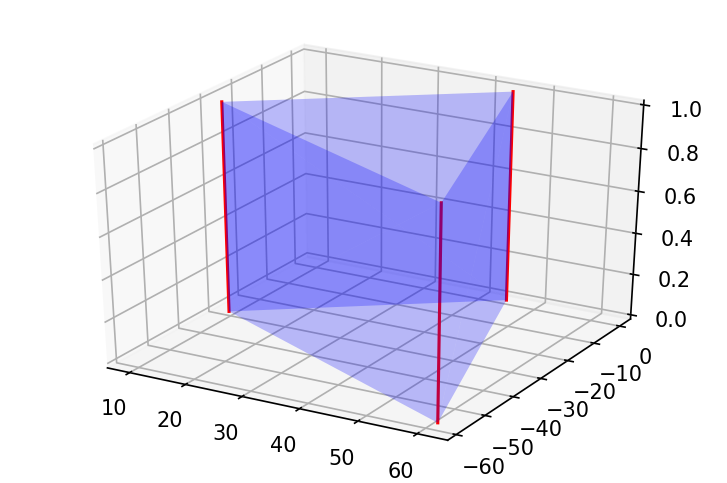

In [3]:
sp = stare_prism(siv=1,tiv_mock=[0,1])

fig = plt.figure() 
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

# usr_figax = add_coastlines(usr_figax)

# ,colors=plt.cm.CMRmap
usr_figax = sp.plot0(
    usr_figax
    ,color='blue'
    ,alpha=0.25
    ,prism_edge_color='red'
    ,end_faces_plot=[False,False]
)

usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

plt.show() 
del usr_figax

resolution (1000.000000 km) ~ level = 3, (float 3.356144)
(lon,lat)=(-155.602778,19.479444) -> spatial_id = 0x2c2401f47797ec43

Full spatial id:              0x2c2401f47797ec43
Geolocation part (bits 61-5): 0x2c2401f47797ec40
Resolution part  (bits  4-0): 0x0000000000000003


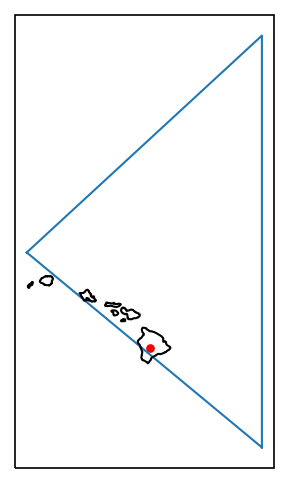

In [4]:
# Set longitude and latitude in degrees to the summit of Mauna Loa.
lon = -155.602778
lat =   19.479444

# Set some unit assumptions
km  = 1
deg = 1

# Set the length scale of a neighborhood triangular element (trixel) about the location.
resolution_scale_km = 1000*km

# Determine the resolution, i.e. the level of the spatial quadtree, of that length scale.
spatial_resolution_level = int(pystare.spatial_resolution_from_km(resolution_scale_km))

# Calculate the spatial index value.
spatial_id = pystare.from_latlon([lat],[lon],spatial_resolution_level)

# Print to check.
print('resolution (%f km) ~ level = %i, (float %f)'%(resolution_scale_km
                                          ,spatial_resolution_level
                                          ,pystare.spatial_resolution_from_km(resolution_scale_km)))
print('(lon,lat)=(%f,%f) -> spatial_id = %s'%(lon,lat,hex16(spatial_id[0])))
print()
print('Full spatial id:              %s'%(hex16(spatial_id[0])))
print('Geolocation part (bits 61-5): %s'%(hex16(spatial_id[0] & (~31))))
print('Resolution part  (bits  4-0): %s'%(hex16(spatial_id[0] & ( 31))))

# Plot the trixel associated with the spatial index value
usr_figax, sivs_cache, sivs_triang = hello_plot(spatial_id,show_fig=False)
# usr_figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
usr_figax.ax.scatter([lon],[lat],s=10,c='r')
plt.show()
del usr_figax

face_zs          [0.  0.5 1. ]
face_edgecolors  k
face_lw          0
face_shading     gouraud
face_vmin        0.0
face_vmax        1.0
face_cmap        <matplotlib.colors.LinearSegmentedColormap object at 0x7ffec6d22a90>
face_alpha       0.5
po transform     <cartopy._crs.Geodetic object at 0x7ffec952f890>
rasterized       True


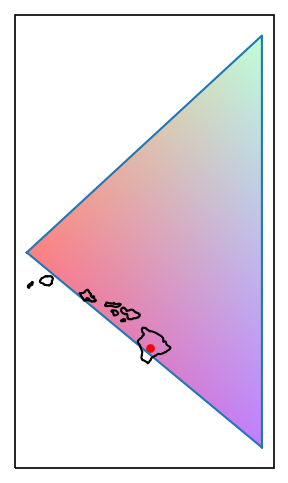

In [5]:
# cd_plt = numpy.array(
#     [[
#     0.5,0.5,0.5
#     ]]
# )
# cd_cmap = colors_to_cmap(cd_plt)

zs = numpy.asarray(range(3),dtype=numpy.float)/2.0
tripcolor_alpha = 0.5
cd_cmap=plt.cm.get_cmap('rainbow')

face_zs   = zs
face_vmin = 0.0
face_vmax = 1.0
face_edgecolors = 'k'
face_cmap   = cd_cmap
face_alpha  = tripcolor_alpha
face_lw     = 0
face_shading = 'gouraud'
rasterized = True

if True:
    # Plot the trixel associated with the spatial index value
    usr_figax, sivs_cache, sivs_triang = hello_plot(
        spatial_id
#        ,plot_options = usr_plot_options
        ,face_zs = face_zs
        ,face_vmin = face_vmin
        ,face_vmax = face_vmax
        ,face_edgecolors = 'k'
        ,face_cmap   = cd_cmap
        ,face_alpha  = tripcolor_alpha
        ,face_lw     = 0
        ,face_shading = 'gouraud'
        ,show_fig=False
        ,rasterized = rasterized
    )
    # usr_figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
usr_figax.ax.scatter([lon],[lat],s=10,c='r')
plt.show()
del usr_figax

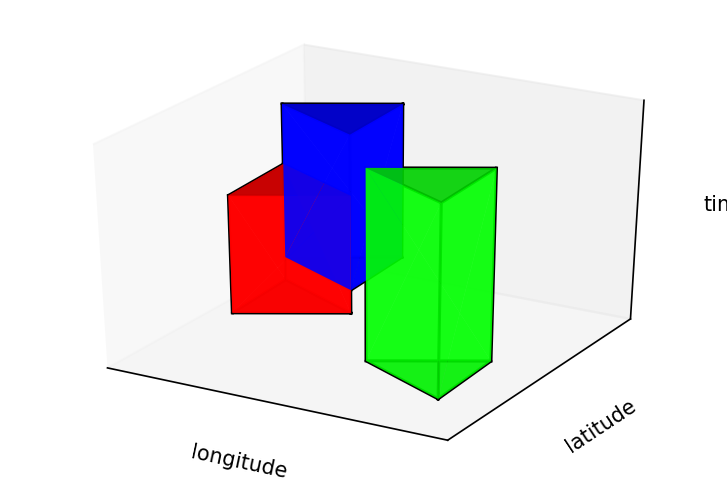

In [6]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

# usr_figax, sivs_cache, sivs_triang = hello_plot(spatial_id,show_fig=False)

if False:
    sp = stare_prism(siv=1,tiv_mock=[0,1]
    #                 ,color_reverse='red'
    #                 ,color='red'
    #                 ,color_forward='red'
                    )
    # ,colors=plt.cm.CMRmap
    sp.plot1(
        usr_figax
    #    ,color='blue'
        ,alpha=0.8
    #    ,prism_edge_color='k'
    #    ,edge_color='k'
    )

if False:
    for siv in [10,11,12,13,14]:
        sp = stare_prism(siv=siv,tiv_mock=[0,1]
                         ,color=mpl.colors.rgb2hex([(siv-9.0)/5,0.5,(15-siv)/5])
                        )
        sp.plot1(
            usr_figax
            ,alpha=(siv-9)/6.0
            ,prism_edge_color='k'
        )

spatial_id[0] = (spatial_id[0] & (~31)) | 10
        
if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]+spatial_increment
        sp = stare_prism(siv=siv
                         ,color=mpl.colors.rgb2hex([0,1,0])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         ,tiv_mock=numpy.array([0.2,0.7,0.9,1.75])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.7
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )   
        
if True:
    for siv in spatial_id:
        sp = stare_prism(siv=siv,tiv_mock=[0,1]
                         ,color=mpl.colors.rgb2hex([1,0,0])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )      

        
if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         ,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )      
                 
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

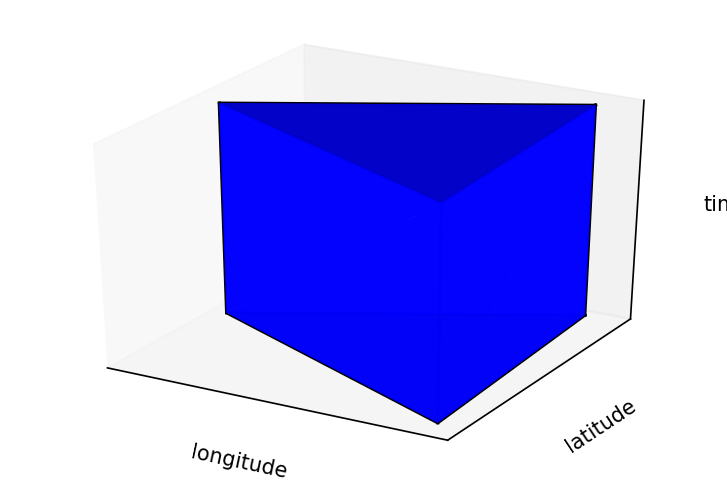

In [7]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,tiv=numpy.array([0x1f484ade232b1b6d],dtype=numpy.int64)
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )     

#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

In [8]:
n = 180
# times = numpy.arange(n,dtype=numpy.double)/(24.0*60.0) + 2440000.0
times = numpy.full([n],fill_value=2440000.0,dtype=numpy.double)
lons  = numpy.zeros([n],dtype=numpy.double)
lats  = numpy.zeros([n],dtype=numpy.double)

for i in range(int(n/2)):
    lons[i] = 0
    lats[i] = i
    lons[int(i+n/2)] = 180.0
    lats[int(i+n/2)] = n/2 - i

In [9]:
n = 128
times = 0.75*numpy.arange(n,dtype=numpy.double)/(24.0*60.0) + 2440000.0
# times = numpy.full([n],fill_value=2440000.0,dtype=numpy.double)
lons  = numpy.zeros([n],dtype=numpy.double)
lats  = numpy.zeros([n],dtype=numpy.double)

for i in range(int(n)):
    lons[i] = (-157.0 + math.cos(math.pi*(i+n/4)/n)*2*math.sin(1.5*math.pi*(i)/n))
    lats[i] = (  20   + math.sin(math.pi*(i+n/4)/n)*math.cos(1.5*math.pi*(i)/n))

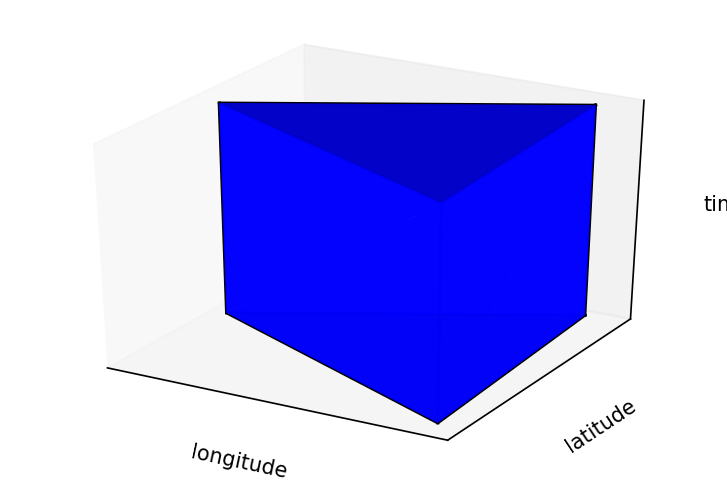

In [10]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))


if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,tiv=numpy.array([0x1f484ade232b1b6d],dtype=numpy.int64)
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )     

#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

In [11]:
sivs = pystare.from_latlon(lats,lons,10)

In [12]:
tivs = pystare.from_JulianTAI(times,numpy.zeros(times.shape,dtype=numpy.double))
tivs = pystare.set_reverse_resolution(tivs,numpy.full(tivs.shape,fill_value=40,dtype=numpy.int64))
tivs = pystare.set_forward_resolution(tivs,numpy.full(tivs.shape,fill_value=40,dtype=numpy.int64))

In [13]:
color_scale = 1.0 / len(sivs)
colors = [ mpl.colors.rgb2hex([(len(tivs)-i)*color_scale,0,i*color_scale]) for i in range(len(tivs)) ]

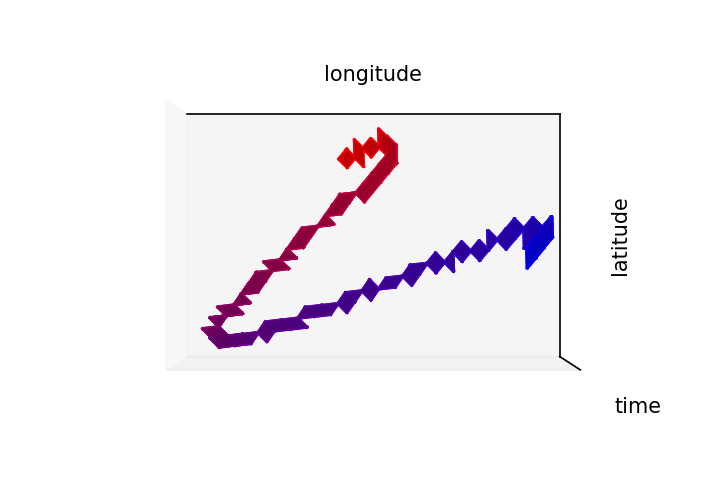

In [14]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        for i in range(len(tivs)):
        # for i in range(5):
            siv = sivs[i]
            # print('siv: ',siv)
            tiv = tivs[i]
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=colors[i]
                             # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                             #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.9
                ,prism_edge_color=colors[i]
                ,end_faces_plot=end_faces_plot
            )     

# add_coastlines(usr_figax,set_global=True)
            
usr_figax.ax.view_init(elev=90.,azim=-90)
# usr_figax.ax.set_top_view()
            
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

In [15]:
lines0 = list(cf.COASTLINE.with_scale('10m').geometries()) # Can be 10m, 50m, and 110m
print('len lines0: ',len(lines0))
if len(lines0) == 134:    # 110m
    line_idx = [107,108,109,110,111]
elif len(lines0) == 1428: # 50m
    line_idx = [802,803,804,805,806,807,808]
    # line_idx = [i for i in range(0,1399)]
elif len(lines0) == 4133: # 10m
    line_idx = [1672,1673,1675,1680,1685,1690,1699,1705]
else:
    print('cf.COASTLINE has unknown size or resolution')

len lines0:  4133


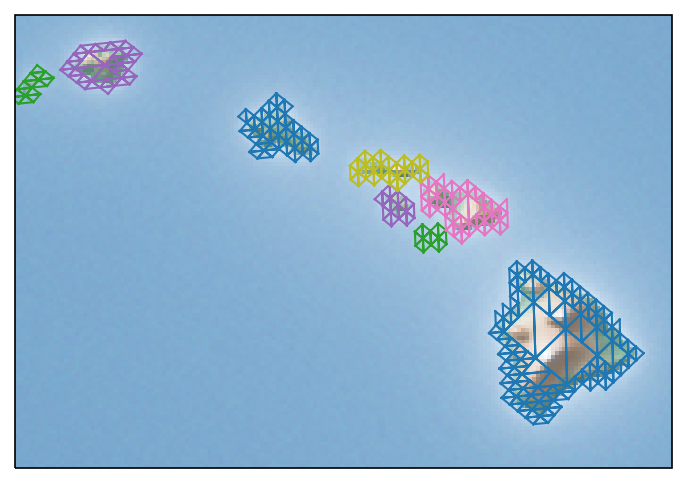

In [16]:
# Make covers from shapely polygons using non-convex hulls

import shapely
import starepandas

figax,sivs_cache,sivs_triang = hello_plot(set_coastlines=False,set_global=False,show_fig=False)  

lines = [ lines0[i] for i in line_idx ]
multiline = shapely.geometry.MultiLineString(lines)

# figax.ax.add_geometries(multiline,cf.COASTLINE.crs,color='c',alpha=0.5)
# figax.ax.set_extent(numpy.array(multiline.bounds)[[0,2,1,3]])

# lons,lats = lonlat_from_coords(list(lines[0].coords))

# cover_resolution = 12
cover_resolution = 10

covers = []
for k in range(len(lines)):
#    lons,lats = lonlat_from_coords(list(lines[k].coords))
    covers = covers + [starepandas.from_polygon(shapely.geometry.polygon.orient(shapely.geometry.Polygon(lines[k]),1)
                                       ,level=cover_resolution,convex=False)]
    
    #  ,resolution=cover_resolution,nonconvex=True)]
    
#    covers = covers + [pystare.to_nonconvex_hull_range_from_latlon(lats,lons,resolution=10)]
#    covers = covers + [pystare.to_hull_range_from_latlon(lats,lons,resolution=10)]

    # Default Cartopy background imagery
    # figax.ax.stock_img()

    # For an example of how to add imagery for background_img, see extras/05-FetchNaturalEarth-1.
    figax.ax.background_img(name='ne_shaded') # Identical to stock_img.
    # figax.ax.background_img(name='ne1_50m_sr_w')
    # figax.ax.background_img(name='ne1_10m_sr_w_dr')
    figax.ax.background_img(name='hypso_50m_sr_w')
    # figax.ax.background_img(name='hypso_10m_sr_w_ob_dr')

    
    # figax,sivs_cache,sivs_triang = hello_plot(pysta.expand_intervals(covers[k],8),figax,show=False)
    figax,sivs_cache,sivs_triang = hello_plot(covers[k],figax,show_fig=False)
                      
figax.ax.set_extent(numpy.array([-160.3, 18.5, -154.5, 22.5])[[0,2,1,3]])

plt.show() # May have to Cell->Current Outputs->Toggle Scrolling to see full figure.
del figax

In [17]:
cover_color_scale = 1.0 / len(covers)
cover_colors = [ mpl.colors.rgb2hex([i*cover_color_scale,1-i*cover_color_scale,i*cover_color_scale]) for i in range(len(covers)) ]

In [18]:
cover_colors

['#00ff00',
 '#20df20',
 '#40bf40',
 '#609f60',
 '#808080',
 '#9f609f',
 '#bf40bf',
 '#df20df']

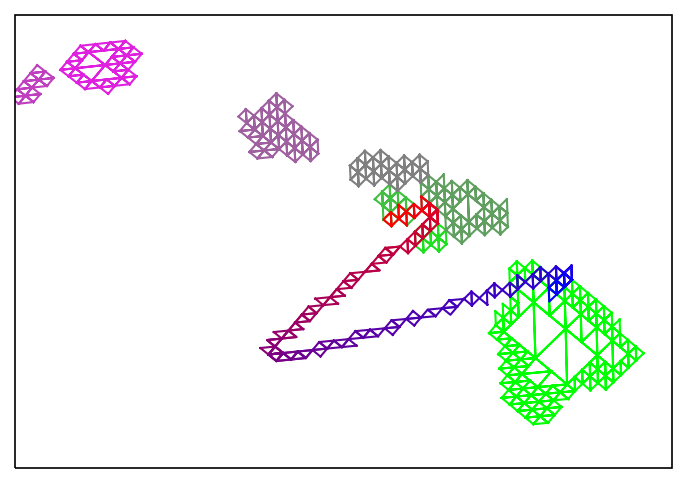

In [19]:
figax,sivs_cache,sivs_triang = hello_plot(set_coastlines=False,set_global=False,show_fig=False,rasterized=True)  

for k in range(len(covers)):

    # For an example of how to add imagery for background_img, see extras/05-FetchNaturalEarth-1.
    #+ figax.ax.background_img(name='ne_shaded') # Identical to stock_img.
    # figax.ax.background_img(name='ne1_50m_sr_w')
    # figax.ax.background_img(name='ne1_10m_sr_w_dr')
    #+ figax.ax.background_img(name='hypso_50m_sr_w')
    # figax.ax.background_img(name='hypso_10m_sr_w_ob_dr')

    
    # figax,sivs_cache,sivs_triang = hello_plot(pysta.expand_intervals(covers[k],8),figax,show=False)
    figax,sivs_cache,sivs_triang = hello_plot(covers[k],figax,show_fig=False,color=cover_colors[k],rasterized=True)

for s in range(len(sivs)):
    figax,sivs_cache,sivs_triang = hello_plot([sivs[s]],figax,color=colors[s],show_fig=False,rasterized=True)

figax.ax.set_extent(numpy.array([-160.3, 18.5, -154.5, 22.5])[[0,2,1,3]])

plt.show() # May have to Cell->Current Outputs->Toggle Scrolling to see full figure.
del figax

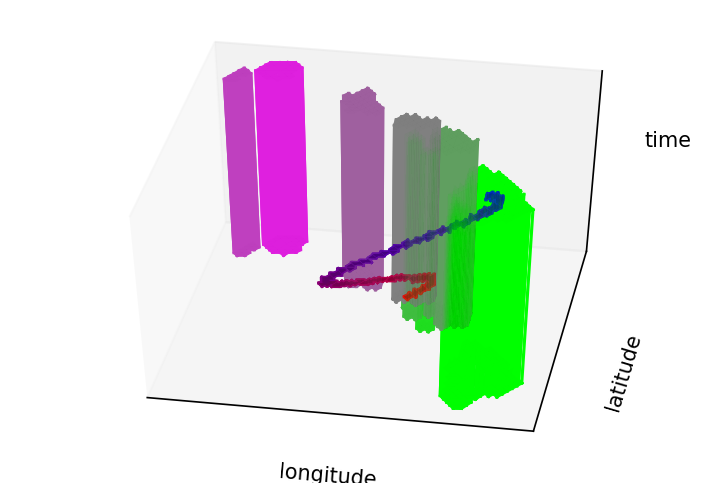

In [20]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    tiv0 = pystare.from_JulianTAI(times[0:1]-0.01,numpy.zeros([1],dtype=numpy.double))
    tiv0 = pystare.set_reverse_resolution(tiv0,numpy.array([45],dtype=numpy.int64))
    tiv0 = pystare.set_forward_resolution(tiv0,numpy.array([25],dtype=numpy.int64))
    
    for ic in range(len(covers)):
        color = cover_colors[ic]
        for s in covers[ic]:
            # print('siv: ',siv)
            siv = s
            tiv = tiv0
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=color
                             # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                             #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.025
                ,prism_edge_color=color
                ,end_faces_plot=end_faces_plot
                ,rasterized=True
            )    

if True:
    if True:
        for i in range(len(tivs)):
        # for i in range(5):
            siv = sivs[i]
            # print('siv: ',siv)
            tiv = tivs[i]
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=colors[i]
                             # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                             #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.9
                ,prism_edge_color=colors[i]
                ,end_faces_plot=end_faces_plot
                ,rasterized=True
            )


# add_coastlines(usr_figax,set_global=True)
            
# usr_figax.ax.view_init(elev=90.,azim=-90)
usr_figax.ax.view_init(elev=45.,azim=-80)
# usr_figax.ax.set_top_view()
            
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax